In [1]:
import pandas as pd
import numpy as np
from skimage.io import imread,imsave, imshow
from skimage.color import rgb2gray, gray2rgb
import matplotlib.pyplot as plt

import torch


In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [4]:
#df = unpickle("/content/drive/MyDrive/Visao Computacional/cifar-10-python/data_batch_5");

### Transformações de Intensidade

1. Alargamento de contraste
* s = 1/(1+(k/r)^e)
    * A constante k é um fator de proporcionalidade que determina a intensidade inicial do sinal
    * r é a distância percorrida pelo sinal até o ponto em que sua intensidade é medida.
    * A constante e é um expoente que determina a taxa de atenuação do sinal.

In [5]:
def alargamento_de_contraste(imagem, k, e):
    altura, largura = imagem.shape

    # Aplica a função de atenuação para cada pixel da imagem
    for i in range(altura):
        for j in range(largura):
            imagem[i, j] = 1/(1+((k/imagem[i, j])**e))

    return imagem

In [6]:
imagem = imread("automobile4.png")
imagem = rgb2gray(imagem)

In [7]:
# exmplo de aplicação do alargamento de contraste
imagem_com_contraste_alargado = alargamento_de_contraste(imagem, 1, 2)

#imsave("img.jpg",imagem_com_contraste_alargado)

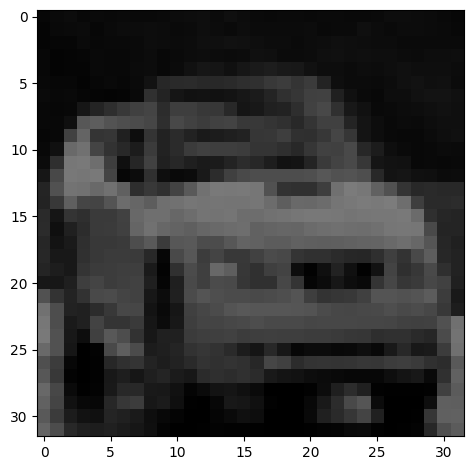

In [8]:
imshow(imagem_com_contraste_alargado, cmap="gray")

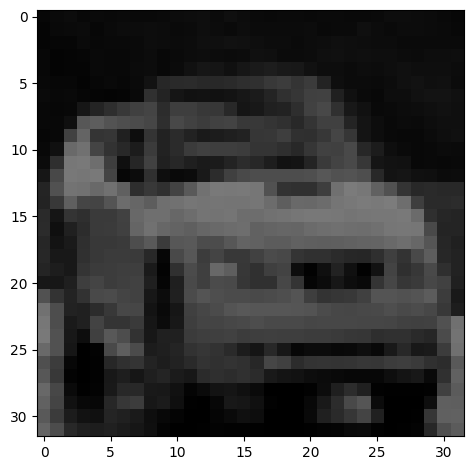

In [9]:
imshow(imagem, cmap="gray")

2. Negativo
* s = L - 1 - r

In [10]:
def negativa(imagem):
    altura, largura = imagem.shape[:2]
    for i in range(altura):
        for j in range(largura):
            imagem[i, j] = 255 - 1 - imagem[i, j]
    return imagem

def negative_s1mple(image):
    return 255 - image

In [11]:
imagem = imread("automobile4.png")
imagemg = rgb2gray(imagem)

In [12]:
img = negativa(imagemg)

In [13]:
print(img)

[[253.82986353 253.78872039 253.77693294 ... 253.78644353 253.8021298
  253.82200549]
 [253.85058745 253.80862588 253.7887502  ... 253.78280471 253.79428667
  253.81052353]
 [253.84526706 253.83520667 253.83772157 ... 253.79709216 253.79008235
  253.79063294]
 ...
 [253.21085765 253.39659529 253.72557608 ... 253.75484    253.22845569
  253.23698588]
 [253.26861843 253.44960824 253.64919922 ... 253.47827843 253.22490784
  253.20726431]
 [253.19794    253.34957412 253.55988118 ... 253.56988039 253.32606667
  253.25579098]]


C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


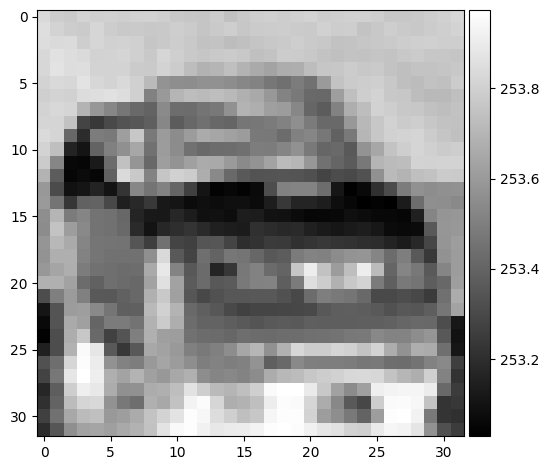

In [14]:
imshow(img, cmap="gray")

3. Logarítmico
* s = c*log(1+r)
    * R = valor de pixel de entrada,
    * C = constante de escala ( O valor de 'c' é escolhido de forma que obtenhamos o valor máximo de saída correspondente ao tamanho do bit usado. Portanto, a fórmula para calcular 'c' é a seguinte: 
        * c = 255 / (log (1 + max_input_pixel_value)))

In [18]:
import math

def logaritmica(c,r):
    return c * np.log(1 + r)


def log_aplicada(imagem, max_pixel):
    c = 255 / np.log(1 + max_pixel)
    # Cria uma imagem resultado com o mesmo shape da imagem de entrada
    result = np.empty_like(imagem)
    
    altura, largura = imagem.shape[:2]
    for i in range(altura):
        for j in range(largura):
            result[i, j] = logaritmica(c, imagem[i][j])
    return result


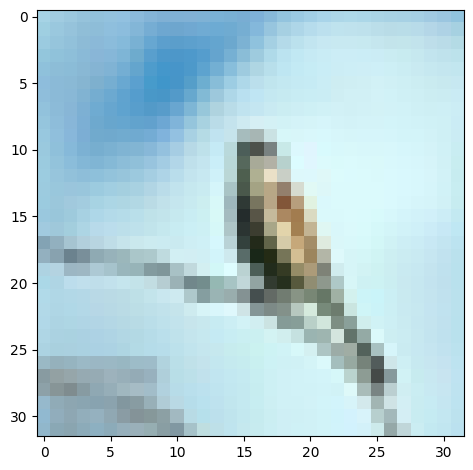

In [24]:
imagem = imread("automobile4.png")

imshow(imagem)

C:\Users\pedro\AppData\Local\Temp\ipykernel_9996\2763564268.py:4: RuntimeWarning: divide by zero encountered in log
  return c * np.log(1 + r)


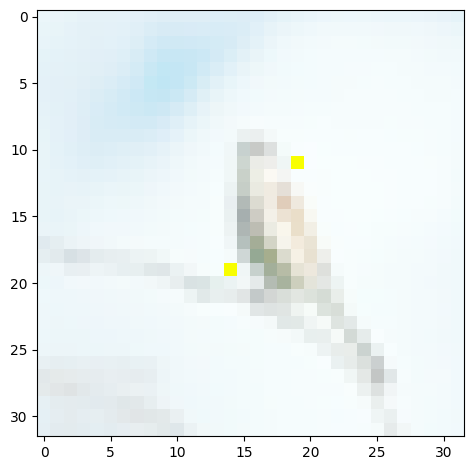

In [28]:
img_log = log_aplicada(imagem, np.max(imagem))

imshow(img_log)


4. Potência
* s = c*r^Y

In [37]:
def potencia(imagem, c, y):
    altura, largura = imagem.shape[:2]
    result = np.empty_like(imagem)
    for i in range(altura):
        for j in range(largura):
            result[i, j] = c*(imagem[i, j] ** y)
    return result

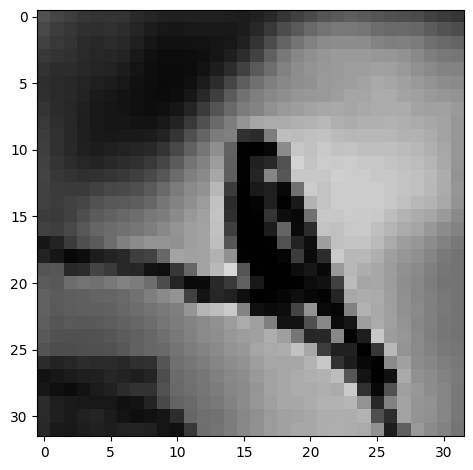

In [75]:
img_gray = rgb2gray(imagem)
img_log = potencia(img_gray, 1, 5)

imshow(img_log, cmap="gray")
